In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
gapminder = pd.read_csv('gapminder_data_graphs.csv', delimiter=',',decimal='.',header=0).iloc[:, 1:]
gapminder.head()

,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Asia,2002,55.5,0.384,0.0471,333.0,25.6


In [78]:
gapminder.duplicated().sum()

0

In [79]:
df = gapminder.dropna(subset=gapminder.select_dtypes(include=['number']).columns)
df

,continent,year,life_exp,hdi_index,co2_consump,gdp,services
4,Asia,2002,55.5,0.384,0.0471,333.0,25.6
5,Asia,2003,56.5,0.393,0.0509,346.0,25.9
6,Asia,2004,57.1,0.409,0.0368,336.0,26.1
7,Asia,2005,57.6,0.418,0.0515,360.0,26.5
8,Asia,2006,58.0,0.429,0.0622,368.0,26.9
...,...,...,...,...,...,...,...
3670,Africa,2014,58.0,0.547,0.8810,1440.0,25.4
3671,Africa,2015,58.6,0.553,0.8810,1450.0,25.7
3672,Africa,2016,59.2,0.558,0.7710,1430.0,26.1
3673,Africa,2017,59.9,0.563,0.8450,1480.0,26.6


In [ ]:
N = len(df)
D = len(df.columns) - 2
L = df['continent'].nunique()

print("Number of observations (N):", N)
print("Number of predictors (D):", D)
print("Number of classes (L):", L)
print()
print(df.describe())

Number of observations (N): 3532
Number of predictors (D): 5
Number of classes (L): 6

              year     life_exp    hdi_index  co2_consump            gdp  \
count  3532.000000  3532.000000  3532.000000  3532.000000    3532.000000   
mean   2008.269536    70.088930     0.676819     4.782874   12200.637033   
std       5.972357     8.866085     0.163818     6.533406   17270.189477   
min    1998.000000    32.500000     0.255000     0.015900     238.000000   
25%    2003.000000    64.400000     0.542750     0.605750    1490.000000   
50%    2008.000000    72.100000     0.700500     2.300000    4365.000000   
75%    2013.000000    76.700000     0.805000     6.730000   14300.000000   
max    2018.000000    84.800000     0.956000    67.100000  105000.000000   

          services  
count  3532.000000  
mean     51.673412  
std      18.217228  
min       5.590000  
25%      38.200000  
50%      53.500000  
75%      66.000000  
max      88.500000  


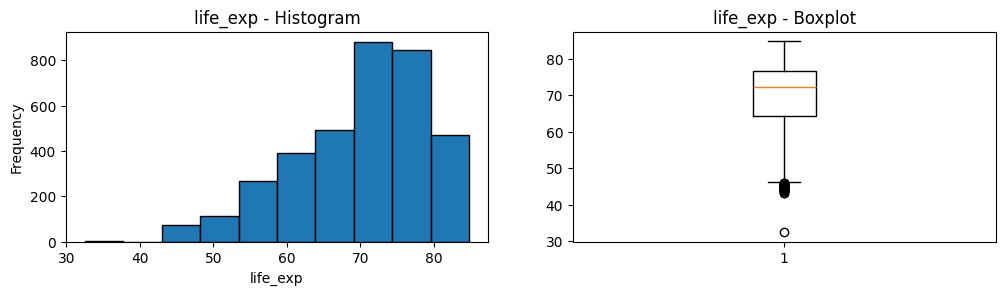

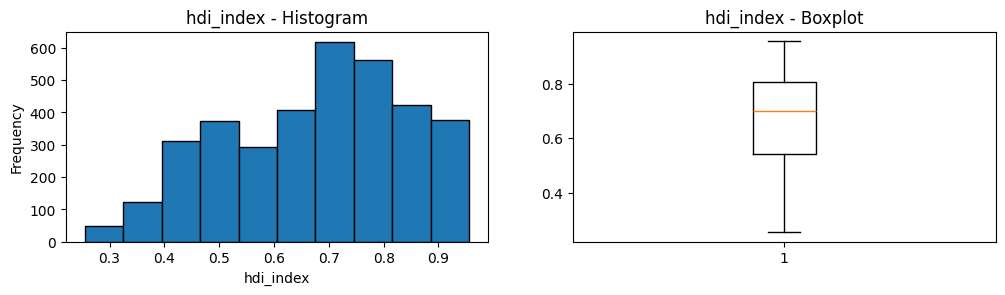

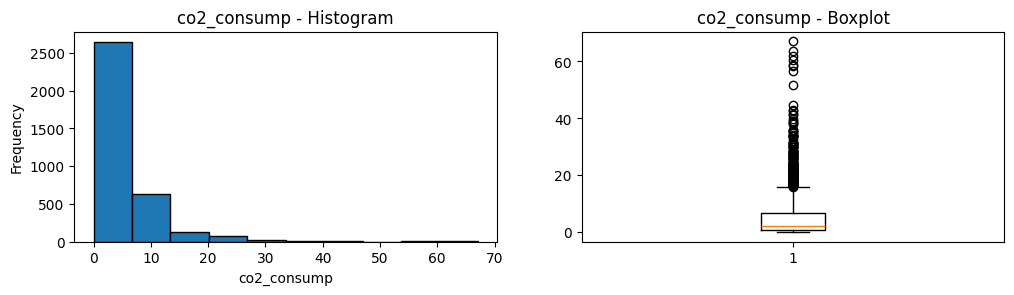

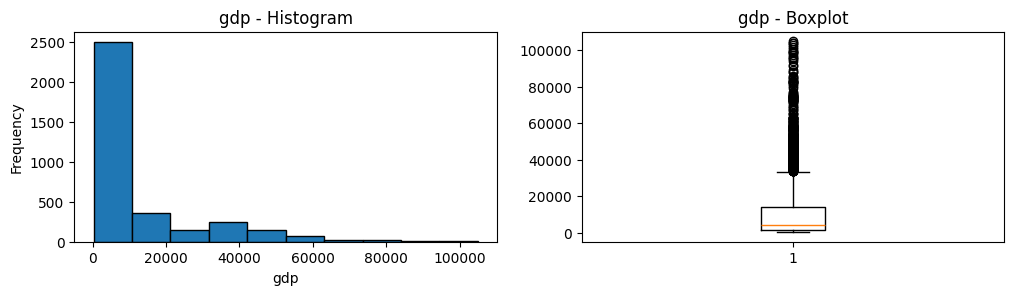

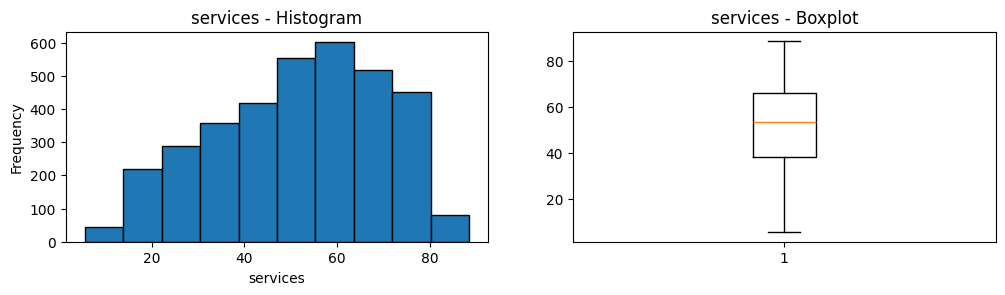

In [87]:
for column in df.drop(columns=['continent','year']).columns:
    plt.figure(figsize=(12, 6))
    if df[column].dtype in ['int64', 'float64']:
        plt.subplot(221)
        plt.hist(df[column], edgecolor='black')
        plt.title(f'{column} - Histogram')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.subplot(222)
        plt.boxplot(df[column])
        plt.title(f'{column} - Boxplot')
    else:
        df[column].value_counts().plot(kind='bar')
        plt.title(f'{column} count')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    plt.show()

In [ ]:
continents = df['continent'].unique()

for column in df.drop(columns=['continent', 'year']).columns:
    stats = []
    for continent in continents:
        df_continent = df[df['continent'] == continent]
        desc = df_continent[column].describe().to_dict()
        desc['Continent'] = continent
        stats.append(desc)

    stats_df = pd.DataFrame(stats).set_index('Continent')
    stats_df.to_markdown(f'\n{column}_statistics.md')

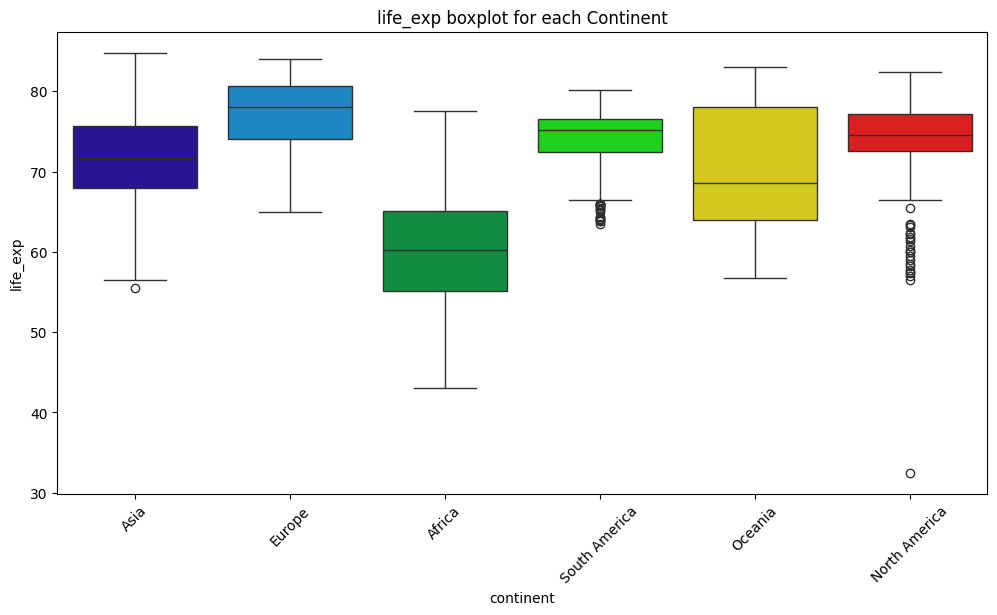

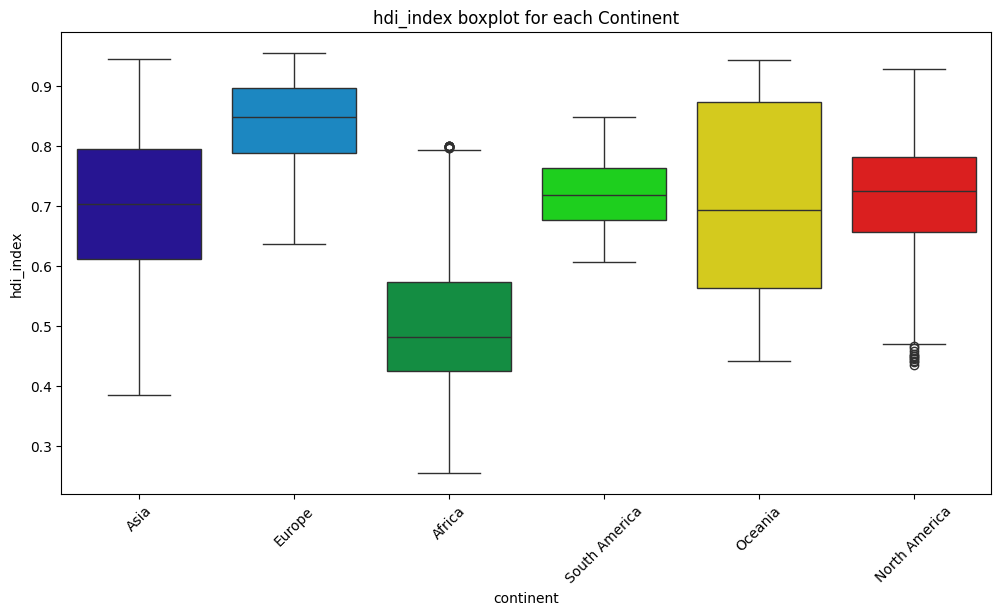

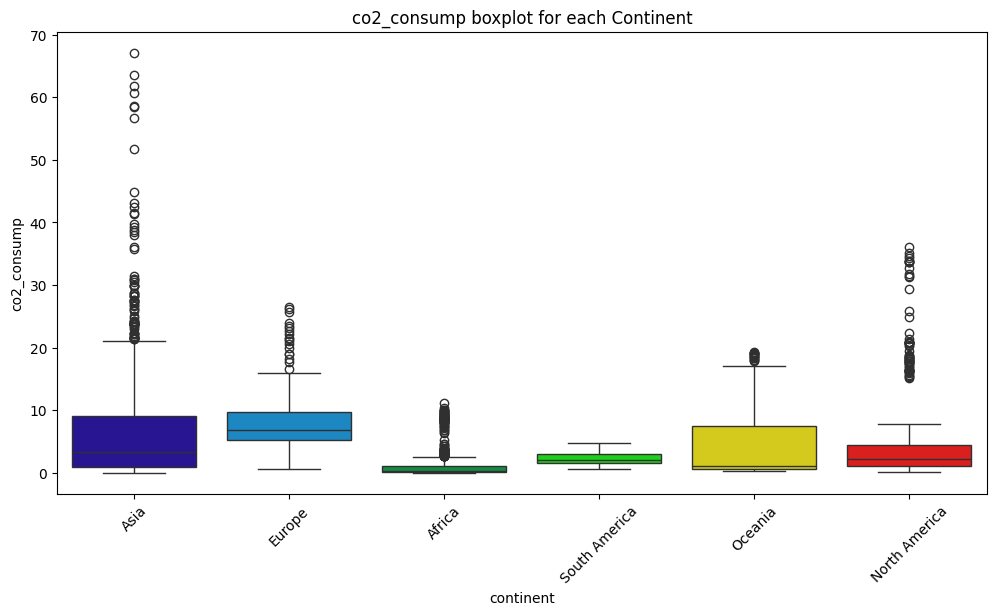

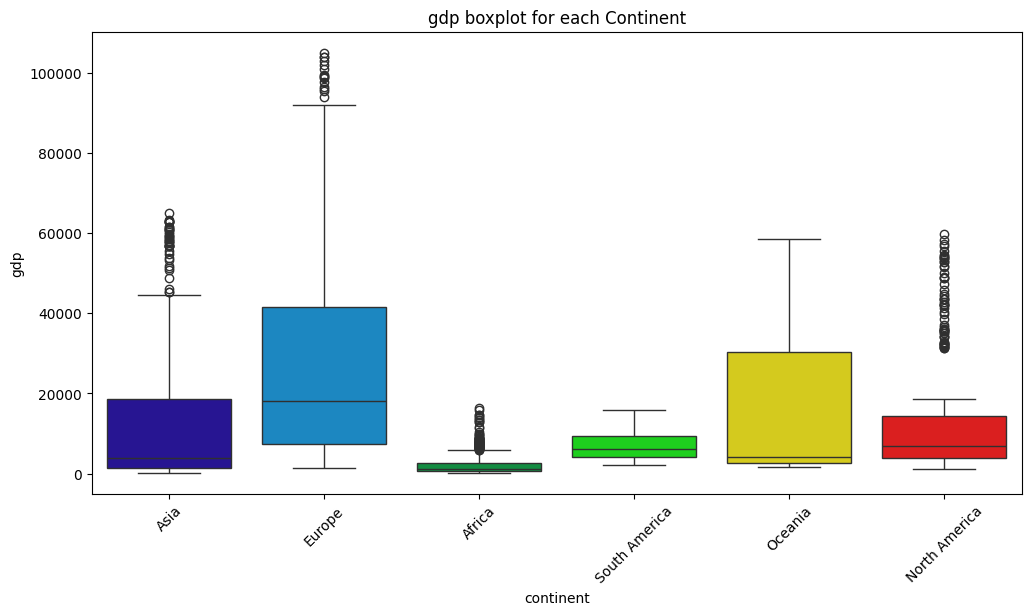

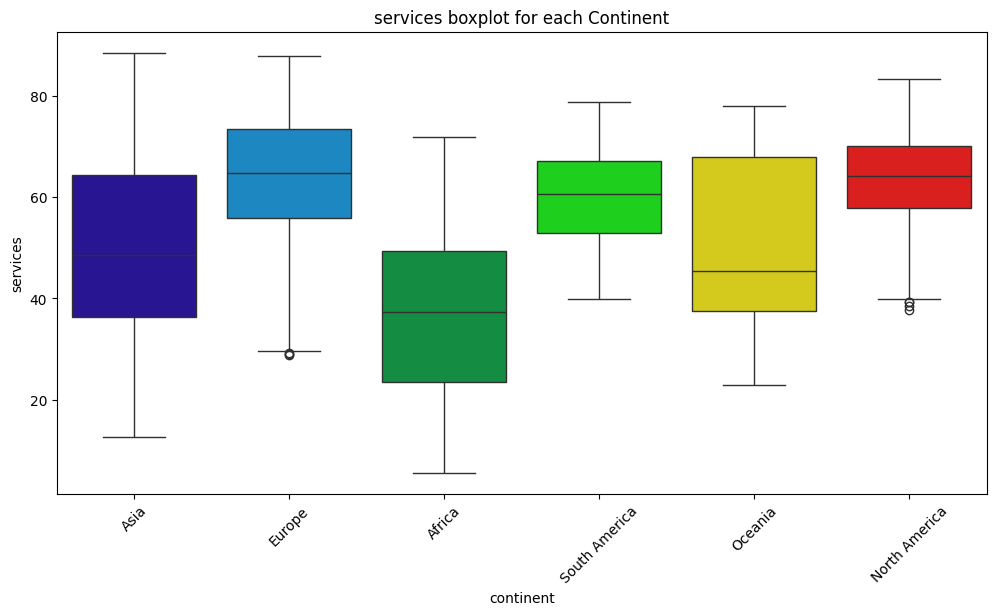

In [86]:
continents = df['continent'].unique()

for column in df.drop(columns=['continent', 'year']).columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x='continent', y=column, data=df,
        hue="continent", palette="nipy_spectral", order=continents
    )
    plt.title(f'{column} boxplot for each Continent')
    plt.xticks(rotation=45)
    plt.show()

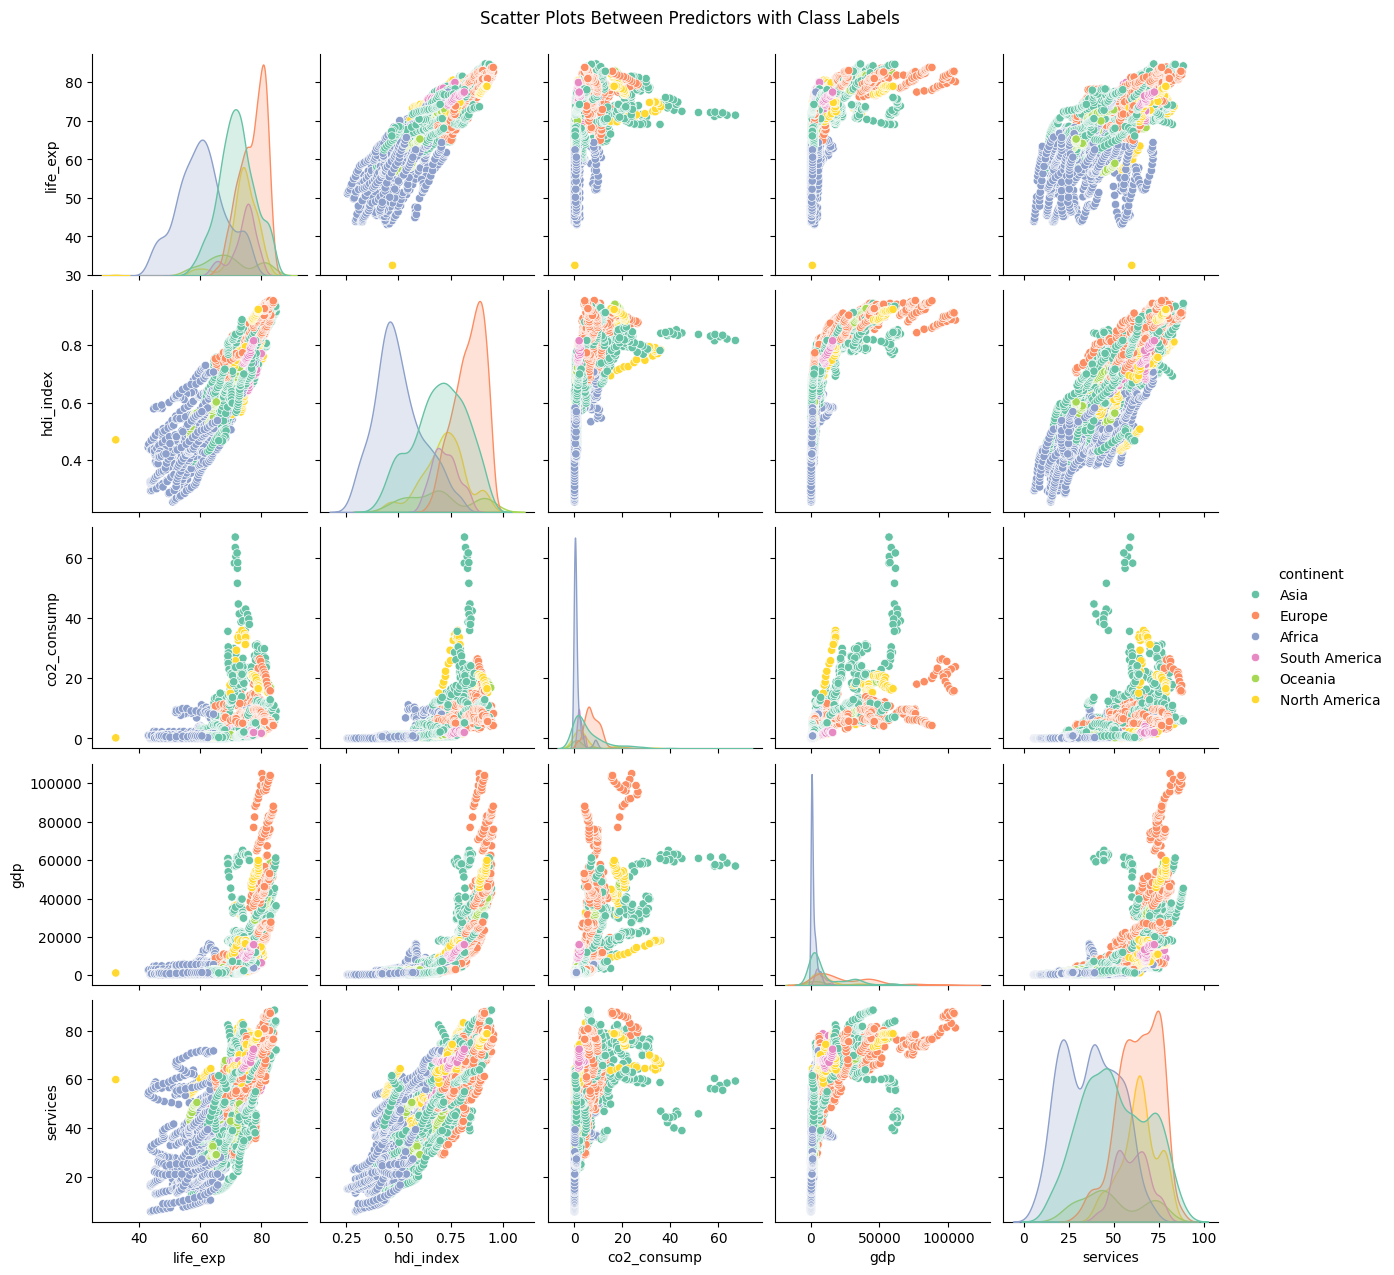

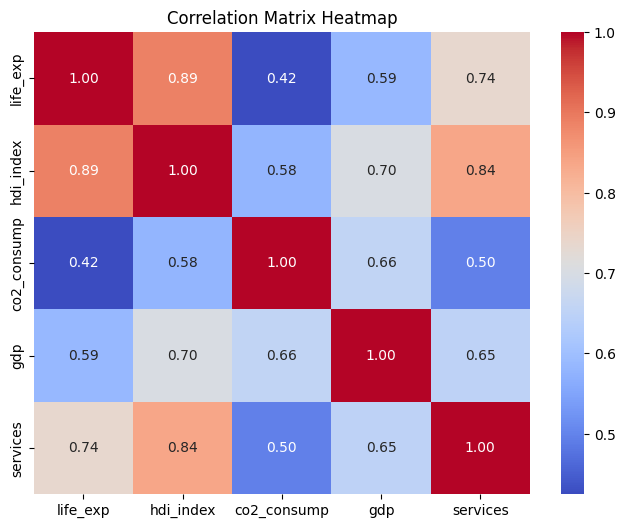

In [ ]:
sns.pairplot(
    data = df,
    vars=df.drop(columns=['continent', 'year']).columns,
    hue="continent",
    palette="Set2",
    diag_kind="kde"
)
plt.suptitle("Scatter Plots Between Predictors with Class Labels", y=1.02)
plt.show()

predictor_columns = df.drop(columns=['continent', 'year']).columns
correlation_matrix = df[predictor_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()

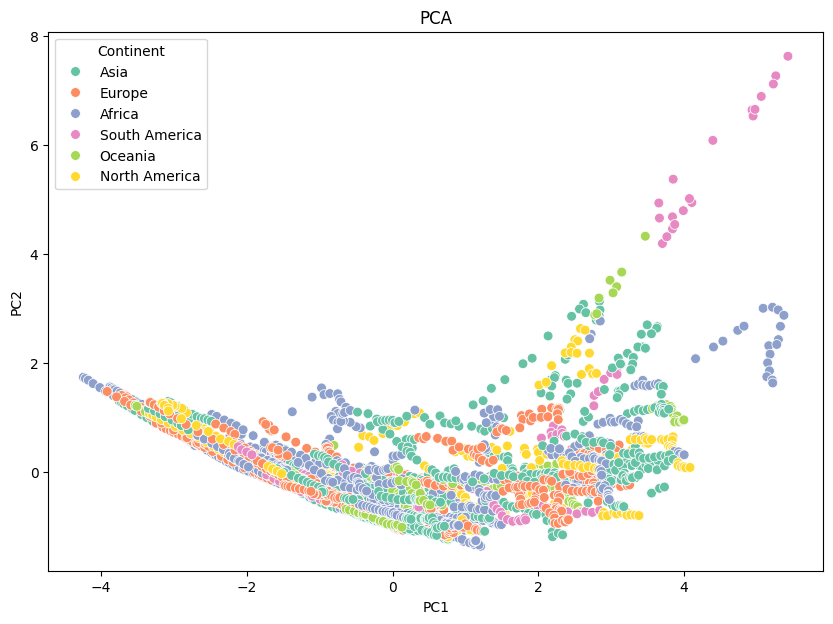

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
predictors = df.drop(columns=['continent', 'year'])
predictors_scaled = scaler.fit_transform(predictors)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(predictors_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['continent'] = df['continent']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='continent', palette='Set2', s=50)
plt.title(f'PCA')
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')
plt.legend(title='Continent')
plt.show()